In [1]:
#Importamos librerias para acceder a los documentos, y luego graficar nuestros Kpi
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

KPI 1

Primer KPI: Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia. La fórmula es la siguiente:

KPI 1 = ((Nuevo Acceso /Acceso Actual )/Acceso Actual) * 100

"Nuevo acceso" se refiere al número de hogares con acceso a Internet después del próximo trimestre.

"Acceso actual" se refiere al número de hogares con acceso a Internet en el trimestre actual.

In [2]:
df_kpi1 = pd.read_csv(r'C:\Users\EFRAIN LINARES\Desktop\Proyecto 2\Data_clean\Penetracion hogares.csv')
df_kpi1.head(3)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,2,Buenos Aires,80.0
1,2024,2,Capital Federal,116.0
2,2024,2,Catamarca,69.0


In [3]:
df_kpi1.loc[:, 'acceso_actual'] = df_kpi1['Accesos por cada 100 hogares'] #Se crea una columna, a la que le daremos
#el valor de la columna "accesos por cada 100 hogares"

In [4]:
df_kpi1.sort_values(by=['Provincia', 'Año', 'Trimestre'], inplace=True) # Vamos a ordenar el DataFrame por provincia, año y trimestre 
df_kpi1['nuevo_acceso'] = df_kpi1.groupby('Provincia')['acceso_actual'].shift(-1) # Definimos nuevo_acceso dentro de cada grupo de provincia

#Calculo del KPI (por provincia)
df_kpi1['KPI'] = ((df_kpi1['nuevo_acceso'] - df_kpi1['acceso_actual']) / df_kpi1['acceso_actual']) * 100
df_kpi1['KPI'] = df_kpi1['KPI'].round(2)

df_kpi1.dropna(subset=['nuevo_acceso'], inplace=True) #Se eliminan nulos

In [20]:
df_kpi1

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,acceso_actual,nuevo_acceso,KPI,cumplido,Año_Trimestre
984,2014,1,Buenos Aires,55.0,55.0,55.0,0.00,False,2014-T1
960,2014,2,Buenos Aires,55.0,55.0,57.0,3.64,True,2014-T2
936,2014,3,Buenos Aires,57.0,57.0,56.0,-1.75,False,2014-T3
912,2014,4,Buenos Aires,56.0,56.0,56.0,0.00,False,2014-T4
888,2015,1,Buenos Aires,56.0,56.0,57.0,1.79,False,2015-T1
...,...,...,...,...,...,...,...,...,...
143,2023,1,Tucumán,60.0,60.0,61.0,1.67,False,2023-T1
119,2023,2,Tucumán,61.0,61.0,61.0,0.00,False,2023-T2
95,2023,3,Tucumán,61.0,61.0,61.0,0.00,False,2023-T3
71,2023,4,Tucumán,61.0,61.0,60.0,-1.64,False,2023-T4


In [5]:
df_kpi1.to_csv(r'C:\Users\EFRAIN LINARES\Desktop\Proyecto 2\Data_clean\df_kpi1.csv')

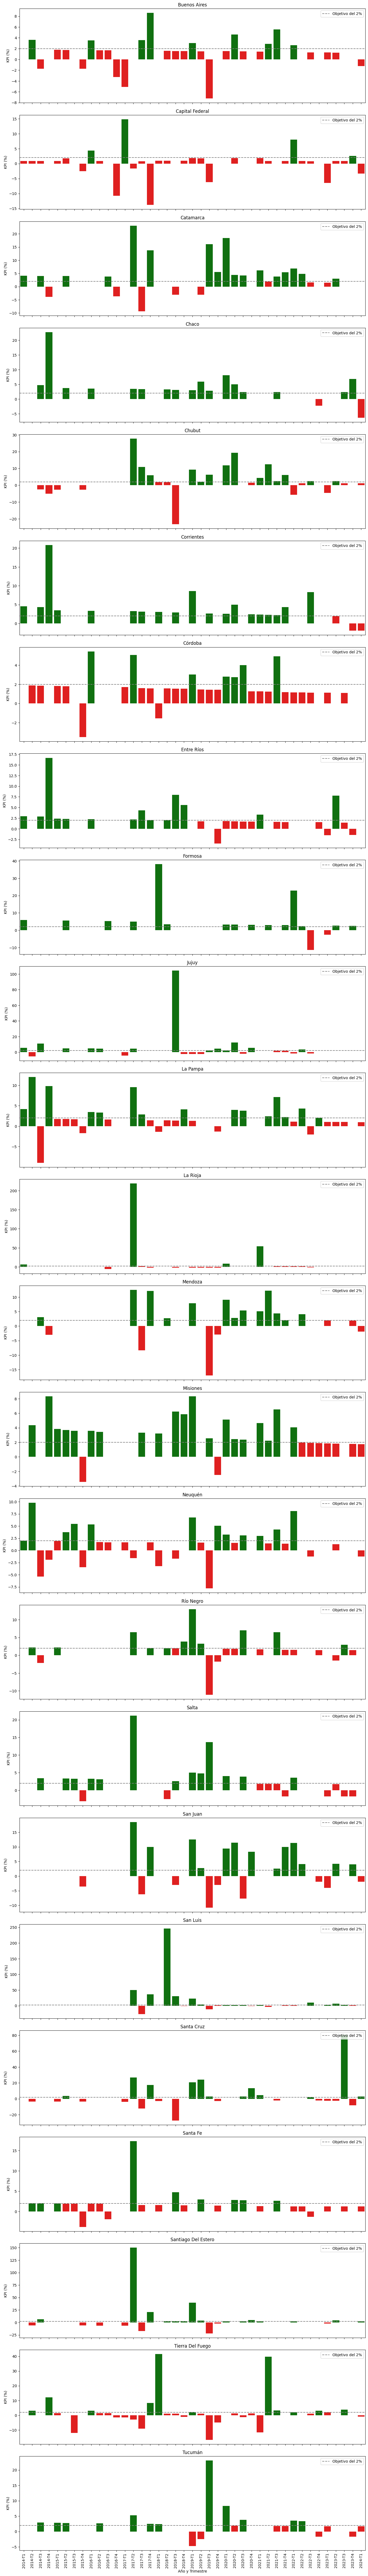

In [6]:
# Vamos a agregar una columna para indicar si se cumplió el objetivo del KPI (2%)
df_kpi1['cumplido'] = df_kpi1['KPI'] >= 2

df_kpi1['Año_Trimestre'] = df_kpi1['Año'].astype(str) + '-T' + df_kpi1['Trimestre'].astype(str) # Creamos una columna de Año y Trimestre para el eje x
provincias = df_kpi1['Provincia'].unique() #extraemos un listado de las provincias.

#Ya podemos graficar nuestra figura:
fig, axes = plt.subplots(nrows=len(provincias), ncols=1, figsize=(14, len(provincias) * 4), sharex=True)
for i, provincia in enumerate(provincias):
    ax = axes[i]
    data = df_kpi1[df_kpi1['Provincia'] == provincia]
    sns.barplot(x='Año_Trimestre', y='KPI', data=data, ax=ax, palette=['green' if val else 'red' for val in data['cumplido']])
    ax.axhline(2, color='gray', linestyle='--', label='Objetivo del 2%')
    ax.set_title(provincia)
    ax.set_xlabel('Año y Trimestre')
    ax.set_ylabel('KPI (%)')
    ax.legend(loc='upper right')

plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

Podemos ver en verde aquellos períodos en donde se cumple el objetivo del 2%, y en rojo aquellos casos en los que no se cumple (entre las 24 provincias del Dataframe).

Se puede observar que en los últimos períodos hay una tendencia a no alcanzarse el objetivo del 2%. Sólo 5 de las 24 Provincias cumplieron el objetivo en el último trimestre: Capital Federal, San Juan, Chaco, La Rioja y San Luis. Hay casos curiosos como Entre Ríos y Santa Cruz, que en los períodos anteriores habían alcanzado el objetivo holgadamente.

LAs estrategias actuales pueden ser generadoras de problemas regionales, o bien, la falta de infraestructura adecuada puede llevar a casos de tan insatisfactorio cumplimiento.

Puede obervarse que en el primer trimestre del año 2019 hubo un gran margen de cumplimiento, de la mayoría de las provincias, en su mayoría con gran soltura. Es recomendable identificar también esa situación para corregir la tendencia final.

KPI 2

Segundo KPI: Aumentar en un 5% el porcentaje de conexiones de Red en Fibra Óptica, por trimeste.

Porcentaje de Fibra Óptica Actual: Porcentaje Fibra Optica = (Fibra Optica /Accesos Totales) ×100 Porcentaje de Fibra Óptica Objetivo: Porcentaje Fibra Optica Objetivo = Porcentaje Fibra Optica Actual× (1+Crecimiento Objetivo) Donde el Crecimiento Objetivo es del 5%.

Este KPI permite analizar la evolución del avance de esta tecnología, y establece un objetivo alcanzable.

In [7]:
df_kpi2 = pd.read_csv(r'C:\Users\EFRAIN LINARES\Desktop\Proyecto 2\Data_clean\Totales Accesos Por Tecnología.csv')
df_kpi2.head(3)

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,2,733491,5867504,4169958,593197,191957,11556107
1,2024,1,774475,5986957,4015101,598682,257941,11633156
2,2023,4,836390,6022532,3908183,585760,194796,11547661


In [8]:
df_kpi2['Periodo'] = df_kpi2['Año'].astype(str) + 'T' + df_kpi2['Trimestre'].astype(str) #SE crea PERIODO
df_kpi2['Accesos Totales'] = df_kpi2[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum(axis=1)
df_kpi2['Porcentaje Fibra Óptica'] = (df_kpi2['Fibra óptica'] / df_kpi2['Accesos Totales']) * 100

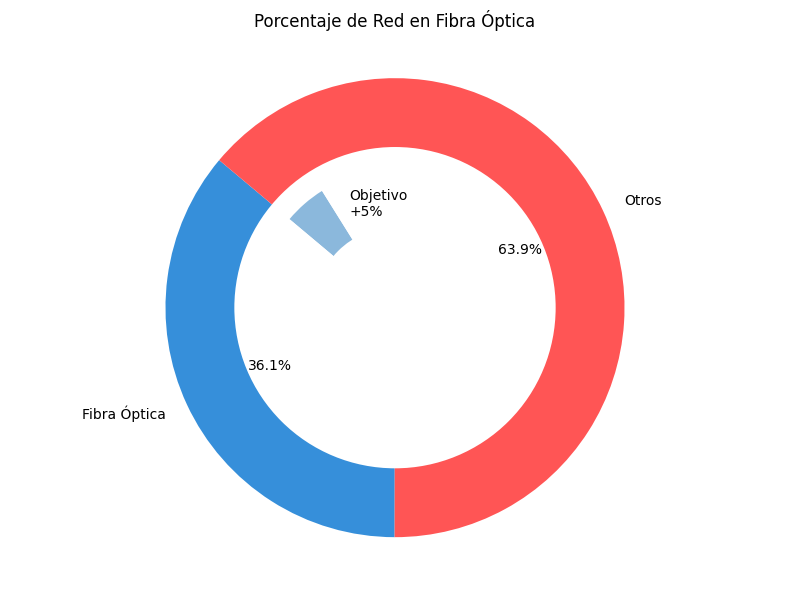

In [9]:
# Obtener el Porc. Fibra del último periodo para la provincia específica
Porcentaje_FO = df_kpi2.loc[df_kpi2['Periodo'] == df_kpi2['Periodo'].max(), 'Porcentaje Fibra Óptica'].values[0]

# Definir el objetivo de crecimiento
objetivo = 5

# Calcular el porcentaje de accesos que no son fibra óptica
otros_accesos = 100 - Porcentaje_FO

# Etiquetas y datos para el gráfico de dona
labels = ['Fibra Óptica', 'Otros']
sizes = [Porcentaje_FO, otros_accesos]
colors = ['#368FDA', '#ff5555']  # Colores para los segmentos

# Crear el gráfico de dona
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de Red en Fibra Óptica')
plt.axis('equal')  # Asegura que el gráfico sea un círculo

# Crear el gráfico de dona adicional para el objetivo
objective_sizes = [objetivo, 100 - objetivo]
objective_labels = ['', '']
objective_colors = ['#8BB8DC', '#ffffff']

# Crear el gráfico de dona pequeño en el centro
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
ax.add_artist(centre_circle)


# Agregar el texto del objetivo en el centro
ax.text(-0.2, 0.4, f'Objetivo\n+{objetivo}%', fontsize=10, color='black')

# Crear el gráfico de dona adicional en el centro
ax.pie(objective_sizes, labels=objective_labels, colors=objective_colors, startangle=122, radius=0.60)

inner_circle = plt.Circle((0, 0), 0.35, fc='white')
ax.add_artist(inner_circle)

plt.tight_layout()
plt.show()

Considerando lo analizado en el EDA, no quedan dudas del avance en el acceso y la calidad de los servicios se obtiene por la incorporacion de nuevas tecnologías. 

Si bien la tecnología Cablemodem ha traido mejoras significativas, la Fibra Óptica trae aparejada una evolución absolutamente considerable.

Por ese motivo, en atención al aumento propuesto en el primer KPI, aquí se propone un aumento del 5% trimestral respecto a las conexiones de Fibra Óptica.

In [10]:
df_kpi2 = df_kpi2.sort_values(by=['Año', 'Trimestre'])
df_kpi2['Porcentaje Variación'] = df_kpi2['Porcentaje Fibra Óptica'].pct_change() * 100

In [11]:
df_kpi2.to_csv(r'C:\Users\EFRAIN LINARES\Desktop\Proyecto 2\Data_clean\df_kpi2.csv')

     Año  Trimestre     ADSL  Cablemodem  Fibra óptica  Wireless   Otros  \
41  2014          1  3697066     2407330        150323     70749   72930   
40  2014          2  3708882     2461670        149363     72405   72148   
39  2014          3  3714764     2569868        155494     85096   70049   
38  2014          4  3764038     2536219        149682     76984   71573   
37  2015          1  3756153     2668248        168188     79098   66045   
36  2015          2  3767821     2756294        150839     82077   59157   
35  2015          3  3788696     2840203        162663     84530   58976   
34  2015          4  3803024     2898226        139187     85726   58668   
33  2016          1  3792493     2806359        164371     85370   58763   
32  2016          2  3782085     3035272        167788     85452   59482   
31  2016          3  3776442     3124855        169898     81455   54300   
30  2016          4  3722794     3210602        178070     85119   55088   
29  2017    

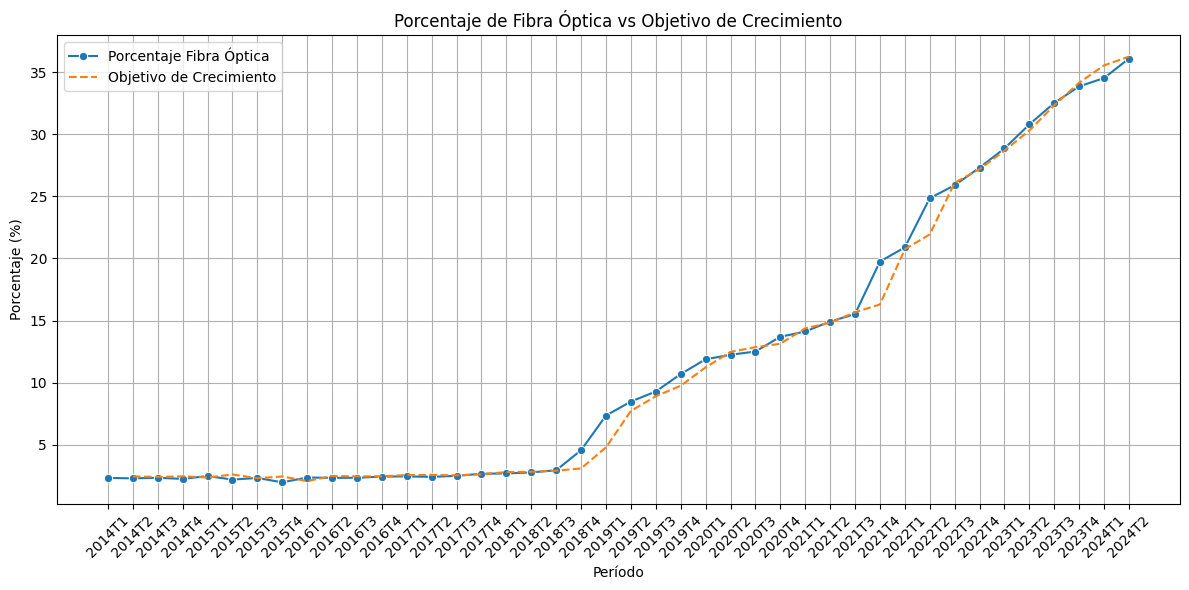

In [12]:
# Calcular el porcentaje de fibra óptica
df_kpi2['Porcentaje Fibra Óptica'] = (df_kpi2['Fibra óptica'] / df_kpi2['Accesos Totales']) * 100

# Calcular el porcentaje de fibra óptica para el período anterior
df_kpi2['Porcentaje Fibra Óptica Anterior'] = df_kpi2['Porcentaje Fibra Óptica'].shift(1)

# Definir el objetivo de crecimiento del 5%
crecimiento_objetivo = 5

# Calcular el porcentaje objetivo para el próximo período
df_kpi2['Porcentaje Fibra Óptica Objetivo'] = df_kpi2['Porcentaje Fibra Óptica Anterior'] * (1 + crecimiento_objetivo / 100)

# Comparar si el porcentaje actual alcanza el objetivo
df_kpi2['Cumplido'] = df_kpi2['Porcentaje Fibra Óptica'] >= df_kpi2['Porcentaje Fibra Óptica Objetivo']

# Mostrar el DataFrame con print
print(df_kpi2)

# Graficar con Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_kpi2, x='Periodo', y='Porcentaje Fibra Óptica', label='Porcentaje Fibra Óptica', marker='o')
sns.lineplot(data=df_kpi2, x='Periodo', y='Porcentaje Fibra Óptica Objetivo', label='Objetivo de Crecimiento', linestyle='--')
plt.title('Porcentaje de Fibra Óptica vs Objetivo de Crecimiento')
plt.xlabel('Período')
plt.ylabel('Porcentaje (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Si bien el crecimiento es sostenido, podemos ver que no alcanza a cubrir el porcentaje previsto, por lo que se debería ajustar el valor para hacerlo más realista. Sin embargo, la recomendación sería tomar medidas para alcanzar ese objetivo, considerando las ventajas de la migración tecnológica sobre tecnologías como ADSL.

KPI 3

Segundo KPI: Aumentar en un 2% la tasa de crecimiento de la velocidad de bajada o descarga, por trimestre y por Provincia.

Tasa Crecimiento (%) = ((Media de bajada actual - Media de bajada mes anterior) / Media de bajada mes anterior) * 100

Objetivo: aumento de tasa del 15% trimestral

Este indicador mide el incremento porcentual en la velocidad media de internet en cada provincia, comparando un trimestre con el trimestre anterior. Este KPI proporciona una visión clara y detallada de cómo está evolucionando la velocidad de la red a lo largo del tiempo, permitiendo identificar tendencias y áreas de mejora. Permite evaluar el progreso en la mejora de la velocidad de internet en diferentes provincias, reflejando la efectividad de las inversiones y políticas implementadas en el área de telecomunicaciones.

In [13]:
df_kpi3 = pd.read_csv(r'C:\Users\EFRAIN LINARES\Desktop\Proyecto 2\Data_clean\Velocidad % por prov.csv')
df_kpi3.head(3)

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2024,2,Buenos Aires,157.41
1,2024,2,Capital Federal,233.01
2,2024,2,Catamarca,97.38


In [14]:
# Primero, ordenamos el DataFrame por Provincia, Año y Trimestre
df_kpi3.sort_values(by=['Provincia', 'Año', 'Trimestre'], inplace=True)

# Creamos una columna para la velocidad de internet en el trimestre anterior
df_kpi3['Mbps Anterior'] = df_kpi3.groupby('Provincia')['Mbps (Media de bajada)'].shift(1)

# Calculamos la tasa de crecimiento en porcentaje
df_kpi3['Tasa Crecimiento (%)'] = ((df_kpi3['Mbps (Media de bajada)'] - df_kpi3['Mbps Anterior']) / df_kpi3['Mbps Anterior']) * 100

# Eliminamos filas con valores NaN (primer trimestre de cada provincia no tiene trimestre anterior)
df_kpi3.dropna(subset=['Mbps Anterior'], inplace=True)

In [15]:
df_kpi3

,Año,Trimestre,Provincia,Mbps (Media de bajada),Mbps Anterior,Tasa Crecimiento (%)
960,2014,2,Buenos Aires,3.851863,3.733133,3.180438
936,2014,3,Buenos Aires,3.969047,3.851863,3.042274
912,2014,4,Buenos Aires,4.198944,3.969047,5.792235
888,2015,1,Buenos Aires,4.323804,4.198944,2.973610
864,2015,2,Buenos Aires,4.463496,4.323804,3.230765
...,...,...,...,...,...,...
119,2023,2,Tucumán,96.690000,95.790000,0.939555
95,2023,3,Tucumán,98.850000,96.690000,2.233944
71,2023,4,Tucumán,101.550000,98.850000,2.731411
47,2024,1,Tucumán,103.360000,101.550000,1.782373


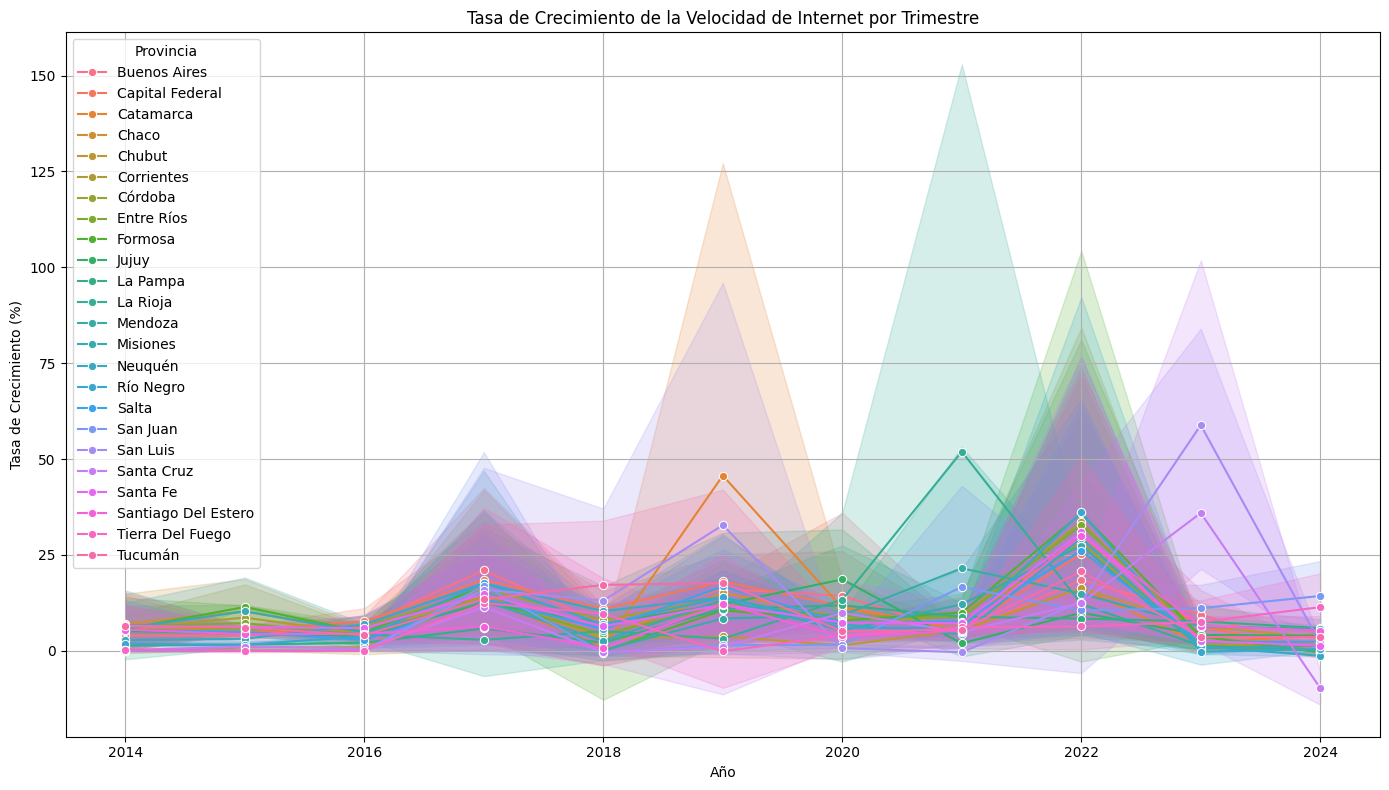

In [16]:
# Ahora, graficamos los resultados del KPI
plt.figure(figsize=(14, 8))

# Creamos el gráfico de líneas para la Tasa de Crecimiento
sns.lineplot(data=df_kpi3, x='Año', y='Tasa Crecimiento (%)', hue='Provincia', marker='o')

plt.title('Tasa de Crecimiento de la Velocidad de Internet por Trimestre')
plt.xlabel('Año')
plt.ylabel('Tasa de Crecimiento (%)')
plt.legend(title='Provincia')
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

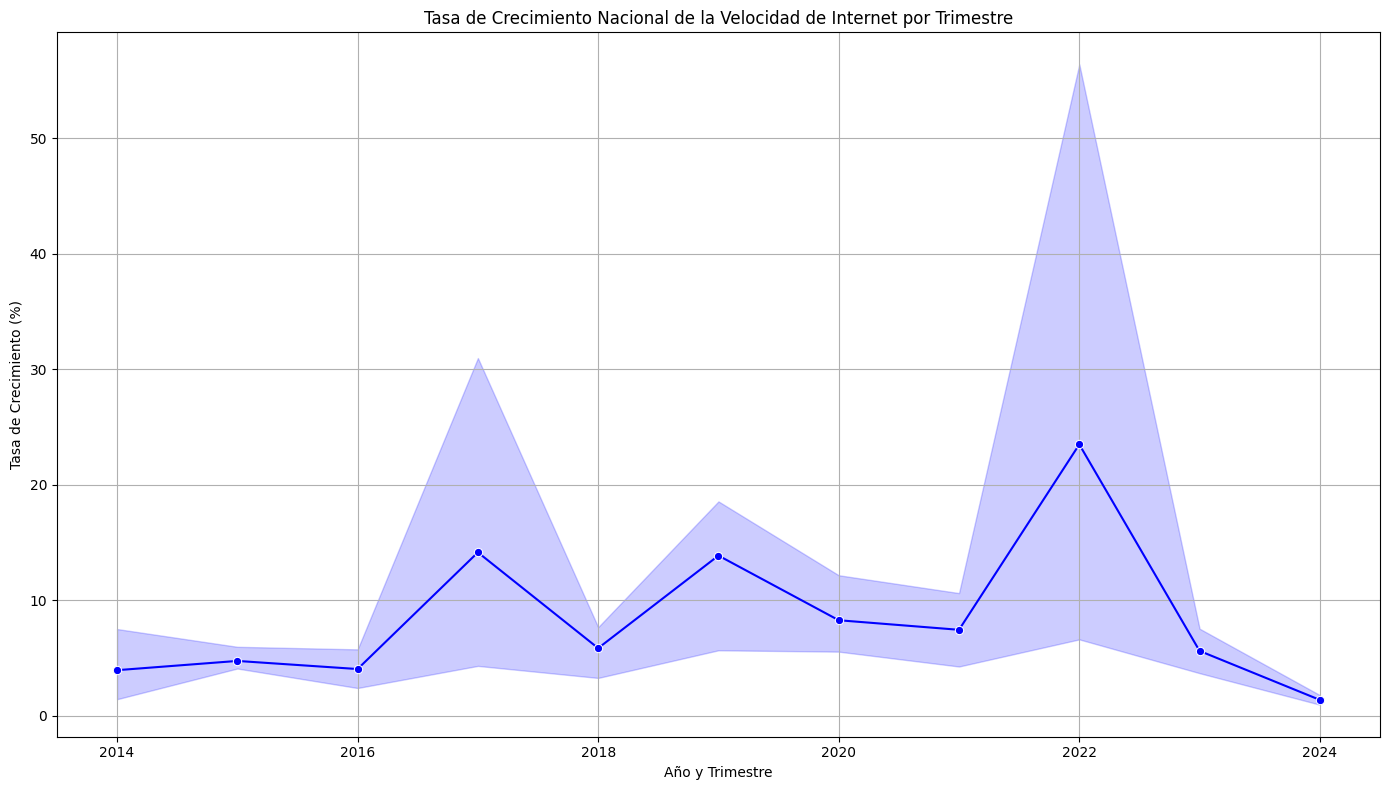

In [17]:
# Calculamos la tasa de crecimiento en porcentaje a nivel nacional
df_nacional = df_kpi3.groupby(['Año', 'Trimestre']).agg({
    'Mbps (Media de bajada)': 'mean',
    'Mbps Anterior': 'mean'
}).reset_index()
df_nacional['Tasa Crecimiento (%)'] = ((df_nacional['Mbps (Media de bajada)'] - df_nacional['Mbps Anterior']) / df_nacional['Mbps Anterior']) * 100

# Eliminamos filas con valores NaN
df_nacional.dropna(subset=['Mbps Anterior'], inplace=True)

# Guardamos el DataFrame resultante en un archivo CSV (opcional)
df_nacional.to_csv('df_nacional_kpi.csv', index=False)

# Graficar la tasa de crecimiento nacional
plt.figure(figsize=(14, 8))

# Crear el gráfico de líneas para la tasa de crecimiento nacional
sns.lineplot(data=df_nacional, x='Año', y='Tasa Crecimiento (%)', marker='o', color='blue')

plt.title('Tasa de Crecimiento Nacional de la Velocidad de Internet por Trimestre')
plt.xlabel('Año y Trimestre')
plt.ylabel('Tasa de Crecimiento (%)')
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [18]:
# Calcular la tasa de crecimiento a nivel nacional
df_nacional = df_kpi3.groupby(['Año', 'Trimestre']).agg({
    'Mbps (Media de bajada)': 'mean'
}).reset_index()

# Crear una columna para la Mbps del trimestre anterior
df_nacional['Mbps Anterior'] = df_nacional.groupby(['Año'])['Mbps (Media de bajada)'].shift(1)

# Calcular la tasa de crecimiento en porcentaje
df_nacional['Tasa de Crecimiento Nacional'] = ((df_nacional['Mbps (Media de bajada)'] - df_nacional['Mbps Anterior']) / df_nacional['Mbps Anterior']) * 100

# Eliminar filas con valores NaN
df_nacional.dropna(subset=['Mbps Anterior'], inplace=True)

# Unir la tasa de crecimiento nacional al DataFrame original
df_kpi3 = pd.merge(df_kpi3, df_nacional[['Año', 'Trimestre', 'Tasa de Crecimiento Nacional']], on=['Año', 'Trimestre'], how='left')

In [19]:
df_kpi3.to_csv(r'C:\Users\EFRAIN LINARES\Desktop\Proyecto 2\Data_clean\df_kpi3.csv')